In [1]:
import pandas as pd
# import sklearn
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("test.csv")
df = df.drop(columns="Unnamed: 0")

In [3]:
df.describe()

,time_id,open_bid,open_ask,open_wap,open_spread,high_bid,high_ask,high_wap,high_spread,low_bid,...,low_wap,low_spread,close_bid,close_ask,close_wap,close_spread,mean_ask_size,mean_bid_size,mean_spread,volatility
count,428932.000000,428932.000000,428932.000000,428932.000000,428932.000000,428932.000000,428932.000000,428932.000000,428932.000000,428932.000000,...,428932.000000,428932.000000,428932.000000,428932.000000,428932.000000,428932.000000,428932.000000,428932.000000,428932.000000,428932.000000
mean,16038.972721,0.999660,1.000383,1.000019,0.000723,1.001825,1.002472,1.002266,0.001408,0.997520,...,0.997718,0.000244,0.999700,1.000332,1.000013,0.000632,763.277342,766.827896,0.000661,0.004233
std,9365.103706,0.002555,0.002562,0.002554,0.000951,0.003705,0.003872,0.003804,0.001597,0.003950,...,0.003891,0.000248,0.004442,0.004433,0.004437,0.000685,4564.268988,4859.762010,0.000677,0.003586
min,5.000000,0.941219,0.945574,0.944802,0.000025,0.944996,0.948405,0.947885,0.000050,0.880774,...,0.883063,0.000003,0.896596,0.896921,0.896785,0.000020,1.317073,1.000000,0.000027,0.000081
25%,7854.000000,0.998993,0.999584,0.999280,0.000246,1.000115,1.000568,1.000427,0.000541,0.996598,...,0.996790,0.000107,0.998095,0.998643,0.998363,0.000238,101.870710,100.922009,0.000263,0.002065
50%,15853.000000,0.999774,1.000264,1.000014,0.000440,1.001132,1.001632,1.001481,0.000944,0.998378,...,0.998526,0.000174,0.999796,1.000265,1.000023,0.000416,152.371251,152.006591,0.000448,0.003159
75%,23994.000000,1.000457,1.001040,1.000751,0.000847,1.002700,1.003327,1.003128,0.001658,0.999475,...,0.999612,0.000284,1.001401,1.001934,1.001671,0.000782,276.961071,276.658900,0.000809,0.005108
max,32767.000000,1.072698,1.076137,1.073528,0.043096,1.125048,1.127150,1.127077,0.050170,1.048982,...,1.049434,0.008099,1.112371,1.113243,1.113141,0.029162,234944.115914,748644.996479,0.019123,0.086421


In [4]:
df.head()


,stocks_id,time_id,open_bid,open_ask,open_wap,open_spread,high_bid,high_ask,high_wap,high_spread,...,low_wap,low_spread,close_bid,close_ask,close_wap,close_spread,mean_ask_size,mean_bid_size,mean_spread,volatility
0,stock_13.csv,5,1.000129,1.000386,1.000213,0.000257,1.002702,1.002959,1.002898,0.000514,...,1.000213,0.000257,1.001158,1.001415,1.001201,0.000257,665.806773,519.456175,0.000262,0.002394
1,stock_13.csv,11,1.000803,1.001032,1.000829,0.000229,1.001261,1.001490,1.001449,0.000458,...,1.000390,0.000229,1.001032,1.001261,1.001234,0.000229,699.031496,912.094488,0.000231,0.000867
2,stock_13.csv,16,0.999348,0.999609,0.999422,0.000261,0.999348,0.999609,0.999517,0.000523,...,0.996623,0.000261,0.997003,0.997263,0.997172,0.000261,513.000000,484.736000,0.000281,0.002077
3,stock_13.csv,31,0.999646,0.999882,0.999755,0.000236,0.999882,1.000118,1.000065,0.000473,...,0.998791,0.000236,0.998700,0.998937,0.998836,0.000237,495.989796,564.155612,0.000243,0.001470
4,stock_13.csv,62,0.999410,0.999646,0.999467,0.000236,1.001298,1.001534,1.001420,0.000472,...,0.999467,0.000236,1.001298,1.001534,1.001382,0.000236,983.516484,889.337912,0.000238,0.001150


In [5]:
df.columns

Index(['stocks_id', 'time_id', 'open_bid', 'open_ask', 'open_wap',
       'open_spread', 'high_bid', 'high_ask', 'high_wap', 'high_spread',
       'low_bid', 'low_ask', 'low_wap', 'low_spread', 'close_bid', 'close_ask',
       'close_wap', 'close_spread', 'mean_ask_size', 'mean_bid_size',
       'mean_spread', 'volatility'],
      dtype='object')

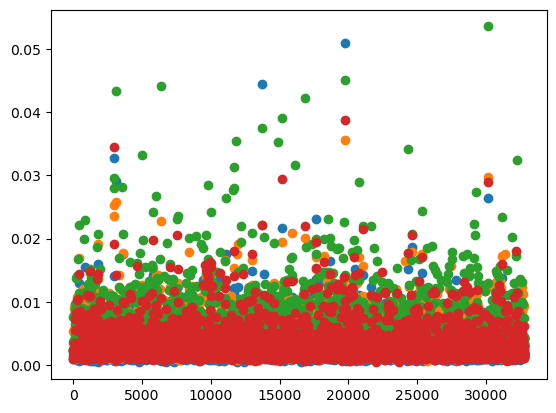

In [6]:
for i in df["stocks_id"].unique()[:4]:
    dt = df[df["stocks_id"] == i]
    plt.scatter(dt['time_id'],dt["volatility"])

In [23]:
from sklearn.cluster import MiniBatchKMeans
import sklearn


In [18]:
kmeans = MiniBatchKMeans(n_clusters=112)

In [37]:
X = df.copy().drop(columns="stocks_id")
X = sklearn.preprocessing.normalize(X,return_norm=1)[0]
Y = df['stocks_id']


In [38]:
X.shape

(428932, 21)

In [39]:
p = kmeans.fit_predict(X=X)

/Users/numanrsheidat/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


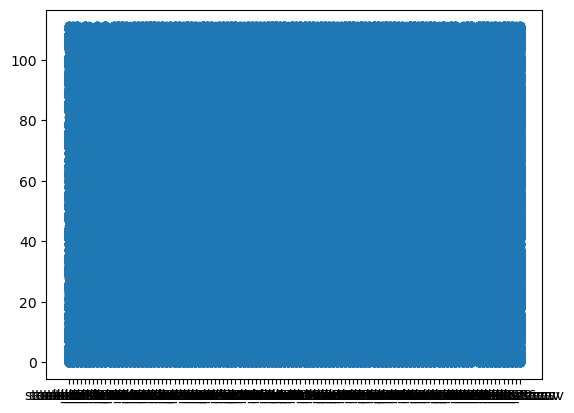

In [40]:
plt.scatter(Y,p)

(array([38536., 42220., 50339., 43882., 40809., 36452., 39918., 44929.,
        38675., 53172.]),
 array([  0. ,  11.1,  22.2,  33.3,  44.4,  55.5,  66.6,  77.7,  88.8,
         99.9, 111. ]),
 <BarContainer object of 10 artists>)

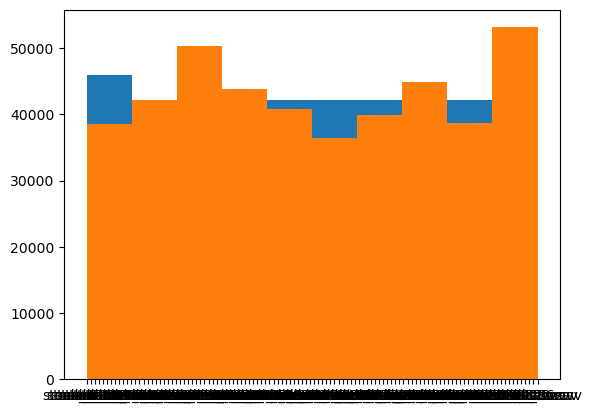

In [49]:
_ = plt.hist(Y)
plt.hist(p)


In [54]:
df.head()

,stocks_id,time_id,open_bid,open_ask,open_wap,open_spread,high_bid,high_ask,high_wap,high_spread,...,low_wap,low_spread,close_bid,close_ask,close_wap,close_spread,mean_ask_size,mean_bid_size,mean_spread,volatility
0,stock_13.csv,5,1.000129,1.000386,1.000213,0.000257,1.002702,1.002959,1.002898,0.000514,...,1.000213,0.000257,1.001158,1.001415,1.001201,0.000257,665.806773,519.456175,0.000262,0.002394
1,stock_13.csv,11,1.000803,1.001032,1.000829,0.000229,1.001261,1.001490,1.001449,0.000458,...,1.000390,0.000229,1.001032,1.001261,1.001234,0.000229,699.031496,912.094488,0.000231,0.000867
2,stock_13.csv,16,0.999348,0.999609,0.999422,0.000261,0.999348,0.999609,0.999517,0.000523,...,0.996623,0.000261,0.997003,0.997263,0.997172,0.000261,513.000000,484.736000,0.000281,0.002077
3,stock_13.csv,31,0.999646,0.999882,0.999755,0.000236,0.999882,1.000118,1.000065,0.000473,...,0.998791,0.000236,0.998700,0.998937,0.998836,0.000237,495.989796,564.155612,0.000243,0.001470
4,stock_13.csv,62,0.999410,0.999646,0.999467,0.000236,1.001298,1.001534,1.001420,0.000472,...,0.999467,0.000236,1.001298,1.001534,1.001382,0.000236,983.516484,889.337912,0.000238,0.001150


In [68]:
pdf = df.pivot(columns = "stocks_id",index = "time_id")
pdf = pdf['close_wap']

In [95]:
nulls = pdf[pdf.isna().any(axis=1).to_numpy()].index
pdf = pdf.drop(index=nulls)

In [96]:
pdf[pdf.isna().any(axis=1).to_numpy()]

stocks_id,stock_0.csv,stock_1.csv,stock_10.csv,stock_100.csv,stock_101.csv,stock_102.csv,stock_103.csv,stock_104.csv,stock_105.csv,stock_107.csv,...,stock_89.csv,stock_9.csv,stock_90.csv,stock_93.csv,stock_94.csv,stock_95.csv,stock_96.csv,stock_97.csv,stock_98.csv,stock_99.csv
time_id,,,,,,,,,,,,,,,,,,,,,


In [99]:
pdf['market'] = pdf.sum(axis=1)

In [108]:
pdf.head()

stocks_id,stock_0.csv,stock_1.csv,stock_10.csv,stock_100.csv,stock_101.csv,stock_102.csv,stock_103.csv,stock_104.csv,stock_105.csv,stock_107.csv,...,stock_9.csv,stock_90.csv,stock_93.csv,stock_94.csv,stock_95.csv,stock_96.csv,stock_97.csv,stock_98.csv,stock_99.csv,market
time_id,,,,,,,,,,,,,,,,,,,,,
5,1.003731,1.003131,0.996585,1.000167,1.002437,1.001765,1.001405,1.002058,1.000581,1.001436,...,0.997307,1.003685,1.002398,1.001805,1.002909,1.006470,0.997806,0.998823,1.004211,112.211006
11,1.000306,1.001941,0.998419,1.001503,1.002093,0.999878,0.999785,1.000444,1.001012,1.000113,...,0.999817,1.007486,1.000212,1.002168,0.999909,1.000002,0.997690,0.999759,1.000481,112.068530
16,0.997603,1.000589,0.997378,0.999196,1.001767,0.999225,0.998548,0.998627,0.997831,0.998172,...,1.000435,0.998475,0.999932,0.999940,0.998588,1.000557,0.998755,1.002074,0.998745,111.925294
31,0.997491,0.996700,0.999706,1.000294,0.997980,0.999274,0.999208,0.999383,0.999147,0.998310,...,0.996576,0.998976,1.000194,1.000276,0.996244,0.998894,1.000150,1.000353,1.001047,111.954275
62,1.000077,1.000536,0.996806,0.999691,1.000988,1.001786,1.001003,1.000143,0.999593,1.003717,...,1.000181,0.998730,0.999245,1.000900,0.999189,1.000314,0.999028,0.999817,0.998389,111.962714


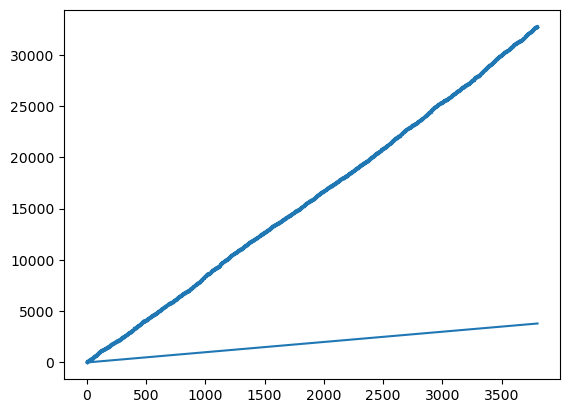

In [106]:
plt.scatter(range(len(pdf.index)),pdf.index,s = 2)
plt.plot([0,len(pdf.index)],[0,len(pdf.index)])

In [109]:
spdf = pdf.sort_values("market")

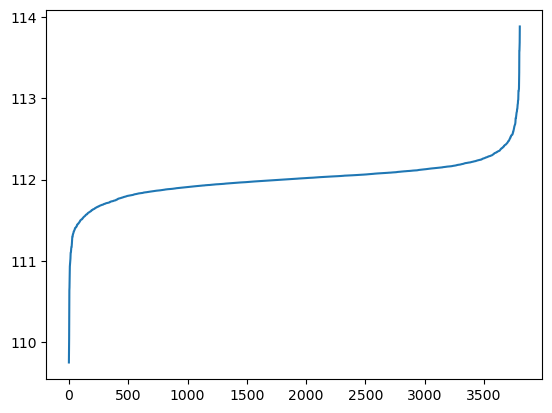

In [111]:
plt.plot(range(len(spdf)),spdf['market'])

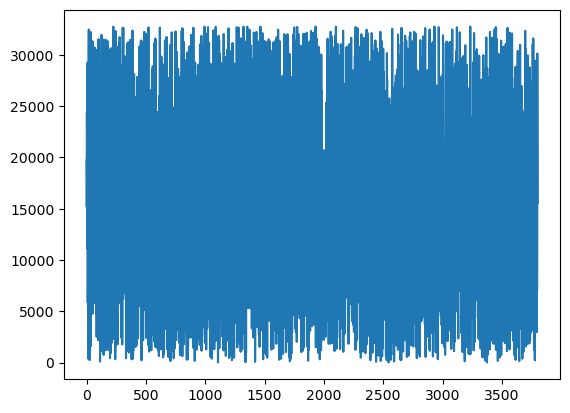

In [113]:
plt.plot(range(len(spdf)),spdf.index)

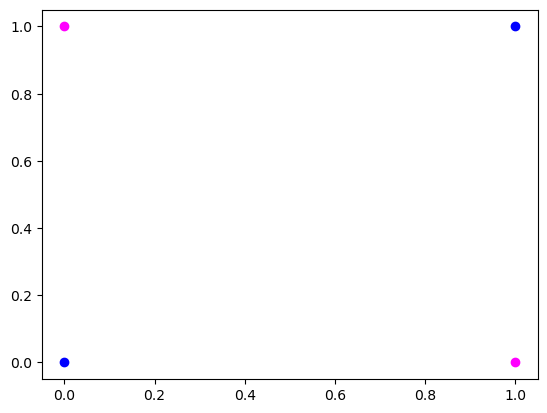

In [124]:
p1 = np.array([[0,1],[1,0]])
p2 = np.array([[0,0],[1,1]])
# p1[:][1]
plt.scatter(p1[:,0],p1[:,1],c="magenta")
plt.scatter(p2[:,0],p2[:,1],c="blue")

In [125]:
p2[:][0]

array([0, 0])

In [126]:
df.columns  

Index(['stocks_id', 'time_id', 'open_bid', 'open_ask', 'open_wap',
       'open_spread', 'high_bid', 'high_ask', 'high_wap', 'high_spread',
       'low_bid', 'low_ask', 'low_wap', 'low_spread', 'close_bid', 'close_ask',
       'close_wap', 'close_spread', 'mean_ask_size', 'mean_bid_size',
       'mean_spread', 'volatility'],
      dtype='object')